In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
data=pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [8]:
data=pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)

In [9]:
X=data.drop(columns='Exited')
y=data['Exited']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()

In [13]:
X_train_scaled=scaler.fit_transform(X_train)

In [14]:
X_test_scaled=scaler.transform(X_test)

In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
  

In [16]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\gtani\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='binary_crossentropy', optimizer='Adam')

In [19]:
history=model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.5578 - val_loss: 0.4518
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4625 - val_loss: 0.4345
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4290 - val_loss: 0.4270
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4396 - val_loss: 0.4214
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4163 - val_loss: 0.4134
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4128 - val_loss: 0.4065
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4012 - val_loss: 0.3970
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3830 - val_loss: 0.3855
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3841 - val_loss: 0.3775
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3642 - val_loss: 0.3712
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3575 - val_loss: 0.3659
Epoch 12/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/ste

In [20]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [21]:
y_log

array([[0.02289662],
       [0.01253559],
       [0.15716065],
       ...,
       [0.72056305],
       [0.15095504],
       [0.23647387]], dtype=float32)

In [22]:
y_pred=np.where(y_log>0.5,1,0)

In [23]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8615

In [25]:
model.layers[0].get_weights()

[array([[-0.29954508,  0.07762629,  0.13278511,  0.05819975,  0.07030833,
         -0.0971498 ,  0.07925694,  0.07507429, -0.02249903, -0.09819181,
          0.03000441],
        [-0.05841155,  0.11897334, -0.47035128,  0.16189358, -0.00163692,
          0.7229627 , -0.20401768, -0.05935552,  0.35950553, -0.6197323 ,
         -0.60225964],
        [-0.09483488,  0.09657857, -0.27947566,  0.23154888, -0.03312333,
         -0.09543288,  0.21786894,  0.0093498 , -0.07823187, -0.08722689,
         -0.02177705],
        [ 0.9317328 ,  0.21080895, -0.1067896 ,  0.19589385,  0.1008911 ,
          0.2220268 , -0.5458186 , -0.11857865,  0.20316304,  0.3488615 ,
          0.06505656],
        [ 0.6059476 ,  0.67792326,  0.257204  ,  0.09878114,  0.99183255,
          0.741464  ,  0.02633097, -1.2109618 , -0.09772725,  0.19446714,
         -0.2988458 ],
        [-0.01519548, -0.00233537, -0.15638232,  0.10773042, -0.04487782,
         -0.33299884, -0.27117682,  0.01912886,  0.1442601 ,  0.4756398

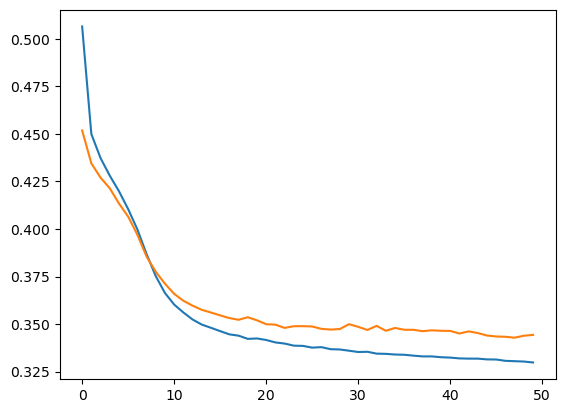

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# This graph shows that it is overfitiing. 

In [29]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test,y_pred)

In [30]:
cn

array([[1537,   70],
       [ 207,  186]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

